1) Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

2) Are explicitly rated songs more popular than songs that are not explicit?

3) Are songs in major key more popular than songs in minor key?

4) Which of the following 10 song features: duration, danceability, energy, loudness, speechiness,
acousticness, instrumentalness, liveness, valence and tempo predicts popularity best?
How good is this model?

5) Building a model that uses *all* of the song features mentioned in question 1, how well can you
predict popularity? How much (if at all) is this model improved compared to the model in question
4). How do you account for this? What happens if you regularize your model?

6) When considering the 10 song features in the previous question, how many meaningful principal
components can you extract? What proportion of the variance do these principal components
account for? Using these principal components, how many clusters can you identify? Do these
clusters reasonably correspond to the genre labels in column 20 of the data?

7) Can you predict whether a song is in major or minor key from valence using logistic regression or a
support vector machine? If so, how good is this prediction? If not, is there a better one?

8) Can you predict genre by using the 10 song features from question 4 directly or the principal
components you extracted in question 6 with a neural network? How well does this work?

9) In recommender systems, the popularity based model is an important baseline. We have a two part question in this regard: a) Is there a relationship between popularity and average star rating for the 5k songs we have explicit feedback for? b) Which 10 songs are in the “greatest hits” (out of the 5k songs), on the basis of the popularity based model?

10) You want to create a “personal mixtape” for all 10k users we have explicit feedback for. This mixtape contains individualized recommendations as to which 10 songs (out of the 5k) a given user will enjoy most. How do these recommendations compare to the “greatest hits” from the previous question and how good is your recommender system in making recommendations?

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('spotify52kData.csv')
df.head()

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [149]:
missing_values = df.isnull().any()
missing_values

songNumber          False
artists             False
album_name          False
track_name          False
popularity          False
duration            False
explicit            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
track_genre         False
dtype: bool

### 1) Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

H0: There is no relationship between song length and popularity of a song.

H1: There is a relationship between song length and popularity of a song.

The t-statistics is -3.5071164046858088. The p value is: 0.00045337282123505463, we reject the null hypothesis.
 The relationship is negative between song length and popularity of a song.


Text(0.5, 1.0, 'Scatter Plot of Population vs Duration')

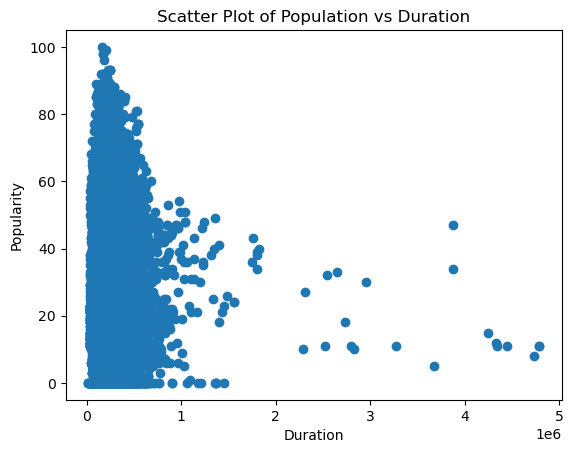

In [152]:
import matplotlib.pyplot as plt

threshold_popular = df.loc[:,'duration'].median()

high_popularity = df[df['duration'] > threshold_popular]['popularity']
low_popularity = df[df['duration'] <= threshold_popular]['popularity']

t, p = stats.ttest_ind(high_popularity, low_popularity, alternative = 'two-sided') 



if p <= 0.05:
    s = ', we reject the null hypothesis.'
    if t < 0: 
        relationship = 'negative'
    if t > 0:
        relationship = 'positive'
        
else: 
    s = ', we fail to reject the null hypothesis.'
    
print('The t-statistics is ' + str(t) + '. The p value is: ' + str(p) + s)
if p <= 0.05:
    print(f' The relationship is {relationship} between song length and popularity of a song.')
    
plt.scatter(df['duration'],df['popularity'])
plt.xlabel('Duration')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Population vs Duration')

We use T-test for this question, with a t-statistic of -3.507 and a p-value of approximately 0.00045, provide strong statistical evidence to support the conclusion that there is a significant negative relationship between popularity and duration. The negative value of the t-statistic indicates that as duration increases, popularity tends to decrease, or vice versa. The very low p-value, which is well below the conventional threshold of 0.05, suggests that the probability of observing such a strong negative relationship by chance is extremely low. Therefore, we can assert that the observed negative correlation between popularity and duration is statistically significant.Shorter songs tend to have higher popularity.


### 2) Are explicitly rated songs more popular than songs that are not explicit?

H0: Explicitly rated songs are not more popular than songs that are not explicit.

H1: Explicitly rated songs are more popular than songs that are not explicit.

The t-statistics is 9.832950458671839. The p value is: 4.250551719953934e-23, we reject the null hypothesis. 


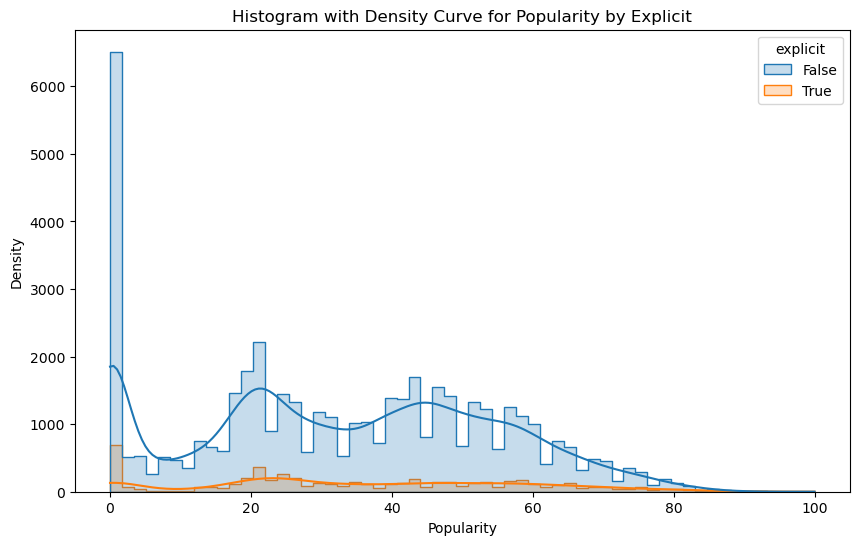

In [166]:
import seaborn as sns
from matplotlib import pyplot as plt

not_explicit = df[df['explicit'] == False]['popularity']
is_explicit = df[df['explicit'] == True]['popularity']

t, p = stats.ttest_ind(is_explicit, not_explicit, alternative = 'greater') 


if p <= 0.05:
    s = ', we reject the null hypothesis. '
    
        
else: 
    s = ', we fail to reject the null hypothesis'
    
print('The t-statistics is ' + str(t) + '. The p value is: ' + str(p) + s)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='popularity', hue='explicit', element='step',kde=True)

plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title('Histogram with Density Curve for Popularity by Explicit')

plt.show()

We chose the independent T-test because the popularity can be reduced to mean and we want to compare two groups with different people. Based on the results of the T-test, with a t-statistic of 9.4955 and an extremely small p-value (approximately 1.48e-21). We conclude that the high t-statistic indicates a substantial difference in the mean popularity scores between the two groups, with explicit songs having higher popularity on average.
The p-value is far below any standard significance level (like 0.05 or 0.01), show that the probability of observing such a marked difference by chance is extremely low. This reinforces the strength of the evidence against the null hypothesis, which posited no difference in popularity between explicit and non-explicit songs.


### 3) Are songs in major key more popular than songs in minor key?

H0: Songs in major key are not more popular than songs in minor key.

H1: Songs in major key are more popular than songs in minor key.

median_major_popularity: 32.0
median_minor_popularity: 34.0
The u_statistics is 309702373.0. The p value is: 0.9999989912386331, we fail to reject the null hypothesis.


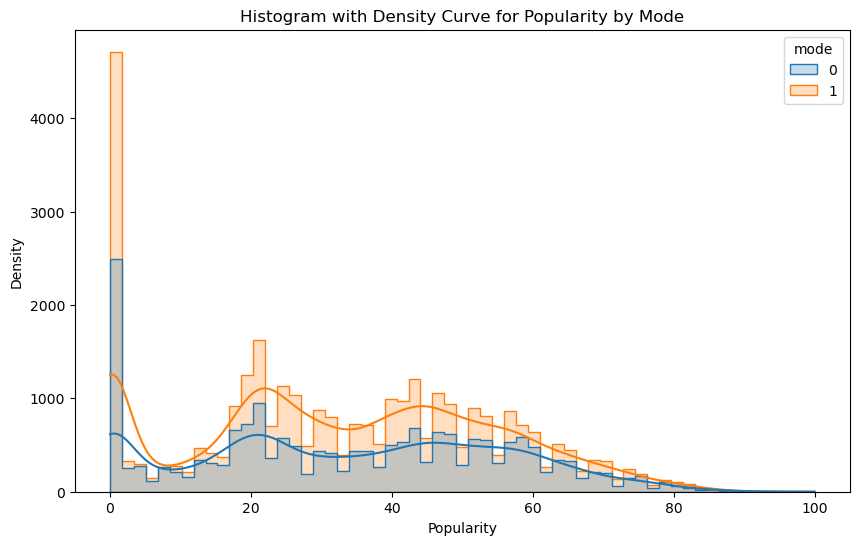

In [175]:
from scipy.stats import mannwhitneyu

major_popularity = df[df['mode'] == 1]['popularity']
minor_popularity = df[df['mode'] == 0]['popularity']

median_major_popularity = df[df['mode'] == 1]['popularity'].median()
median_minor_popularity = df[df['mode'] == 0]['popularity'].median()

# Perform the Mann-Whitney U test
u_statistic, p = mannwhitneyu(major_popularity, minor_popularity, alternative='greater')

print('median_major_popularity:', median_major_popularity)
print('median_minor_popularity:', median_minor_popularity)


if p <= 0.05:
    s = ', we reject the null hypothesis.'
        
else: 
    s = ', we fail to reject the null hypothesis.'
print('The u_statistics is ' + str(u_statistic) + '. The p value is: ' + str(p) + s)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='popularity', hue='mode', element='step',kde=True)

plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title('Histogram with Density Curve for Popularity by Mode')

plt.show()

The results show a p-value = 0.999.  indicates that there is a statistically significant difference in Spotify popularity scores between songs in major keys and songs in minor keys. We conclude that major key songs are not more popular than minor key songs.
Moreover, songs in a minor key have a slightly higher median popularity score compared to those in a major key, indicating that minor key songs tend to be more popular among Spotify listeners in this sample. 

### 4) Which of the following 10 song features: duration, danceability, energy, loudness, speechiness,acousticness, instrumentalness, liveness, valence and tempo predicts popularity best? How good is this model?

R^2 is0.002753973318380898


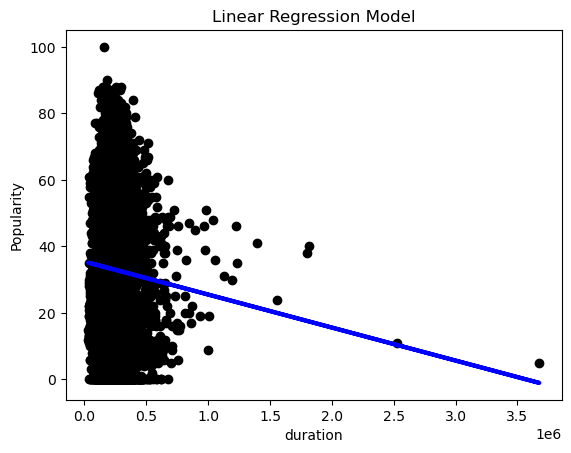

R^2 is0.0015211602071654173


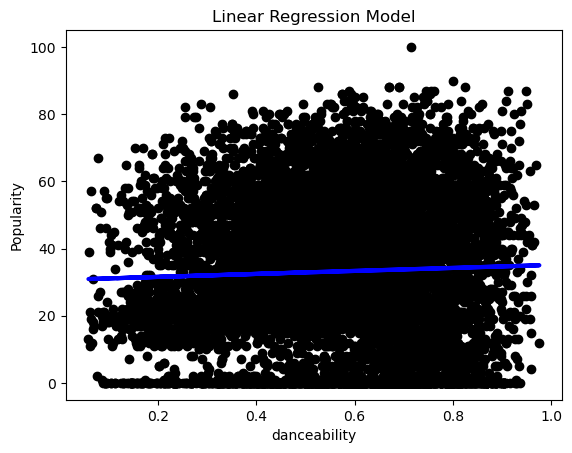

R^2 is0.003561843331704506


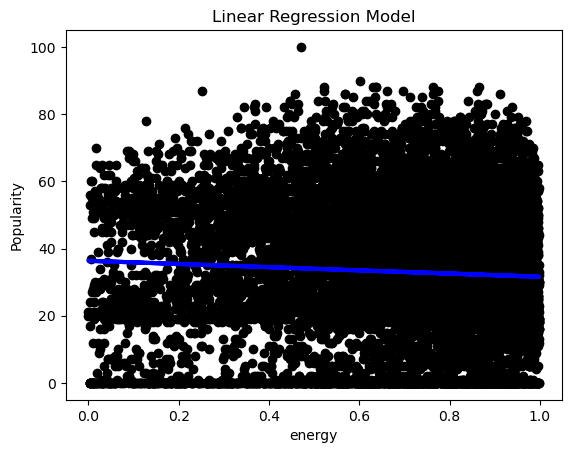

R^2 is0.0031287619442768033


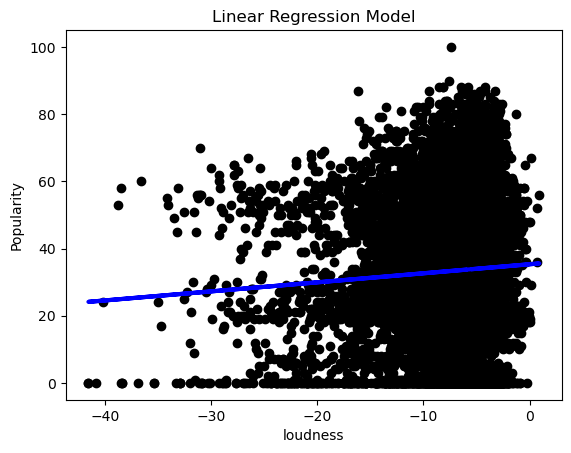

R^2 is0.002603812319451504


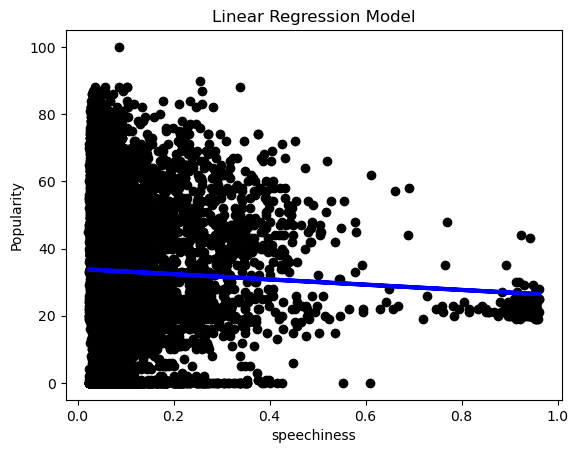

R^2 is0.0006974781936964769


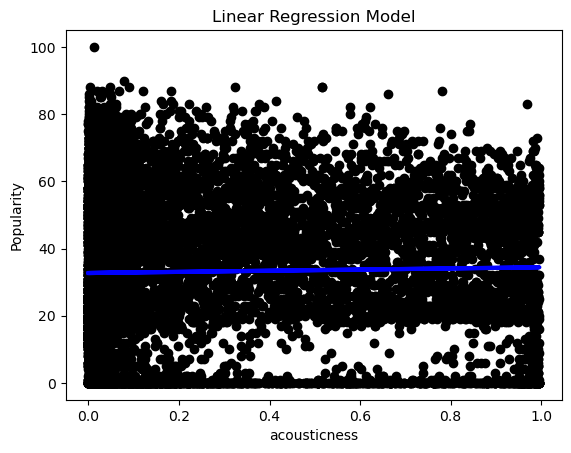

R^2 is0.023394764188413686


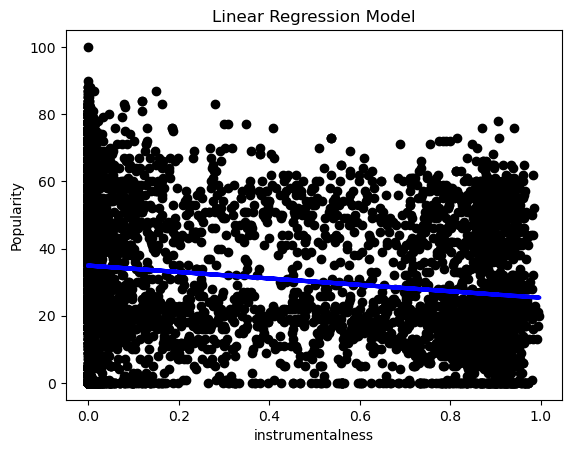

R^2 is0.002487901009179838


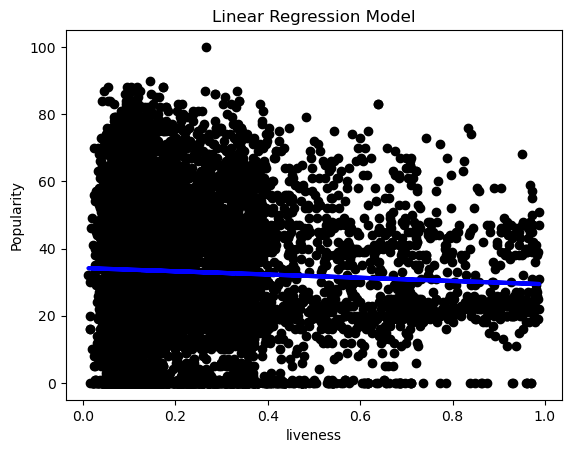

R^2 is0.0013870261987594112


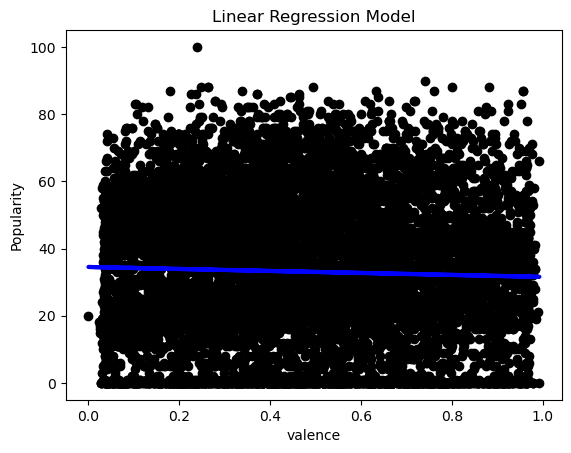

R^2 is-0.00016155507996318264


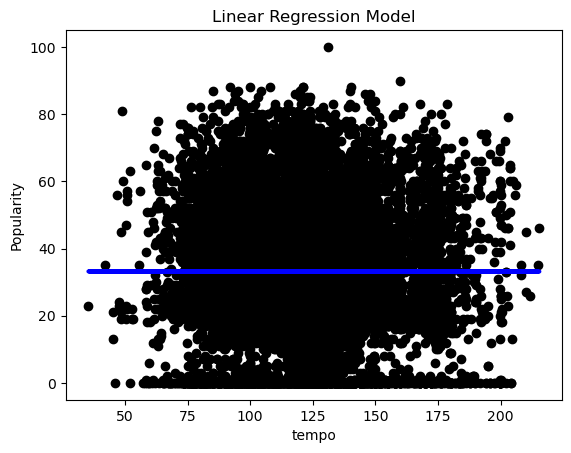

[0.002753973318380898, 0.0015211602071654173, 0.003561843331704506, 0.0031287619442768033, 0.002603812319451504, 0.0006974781936964769, 0.023394764188413686, 0.002487901009179838, 0.0013870261987594112, -0.00016155507996318264]
The best feature predicting popularity is: instrumentalness
The best R2: 0.023394764188413686


In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
           'liveness', 'valence', 'tempo']

r2_list = []
best_feature = None
best_r2 = 0

for feature in features:

    X = df[[feature]]
    y = df['popularity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19100731)

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_feature = feature

    print('R^2 is'+str(r2))
    r2_list.append(r2)
    
    plt.scatter(X_test, y_test, color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.title('Linear Regression Model')
    plt.show()
    
print(r2_list)

print(f"The best feature predicting popularity is: {best_feature}")
print(f"The best R2: {best_r2}")


    
    
    



471.3156656218949
inf


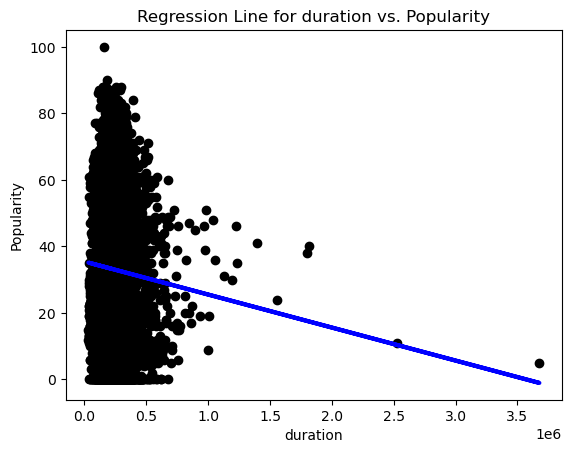

471.89831435305445
471.3156656218949


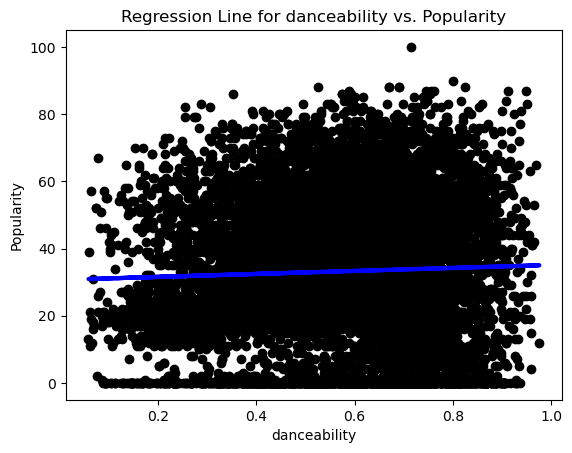

470.9338523251976
471.3156656218949


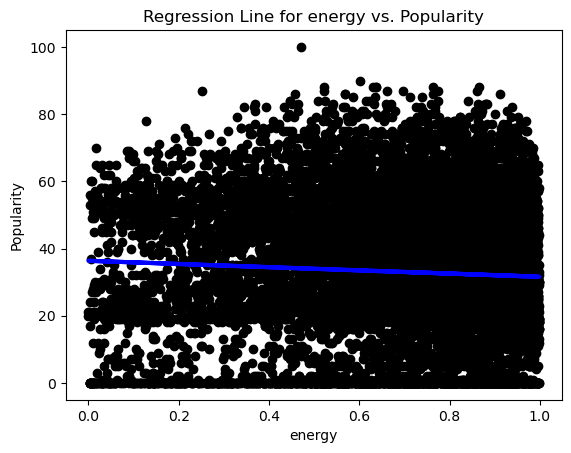

471.1385340556058
470.9338523251976


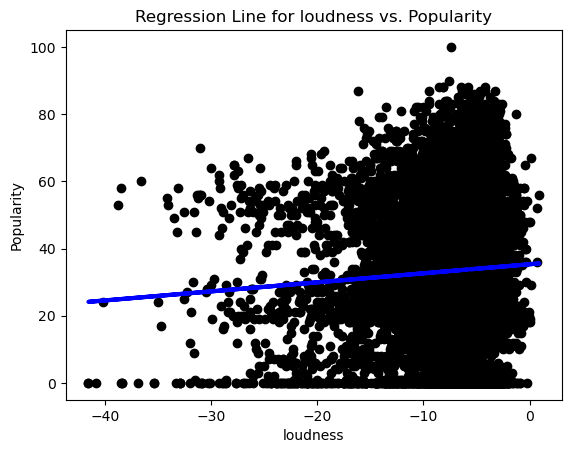

471.3866342988986
470.9338523251976


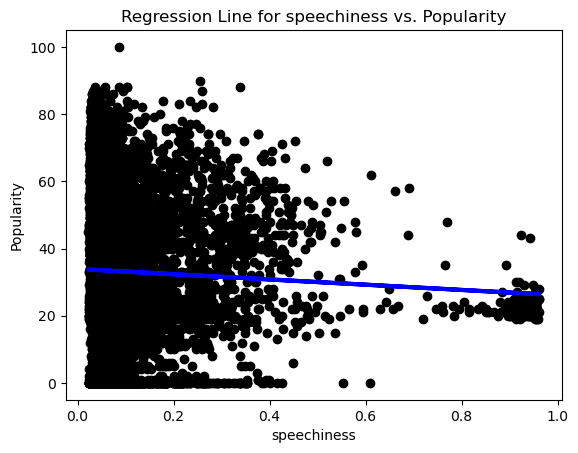

472.2876006736334
470.9338523251976


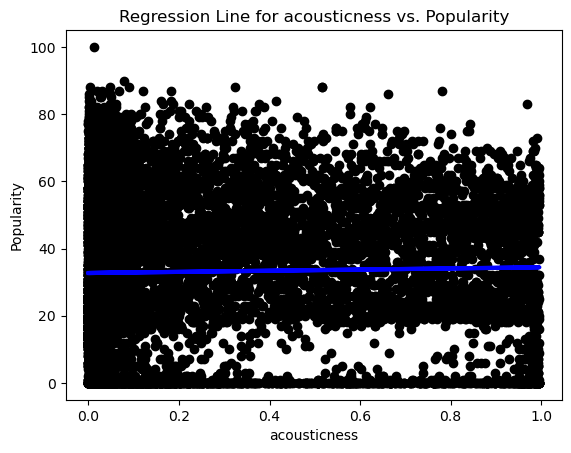

461.5604719910481
470.9338523251976


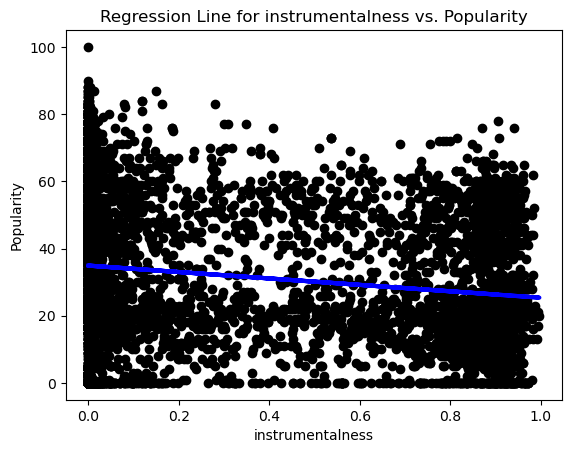

471.44141598254754
461.5604719910481


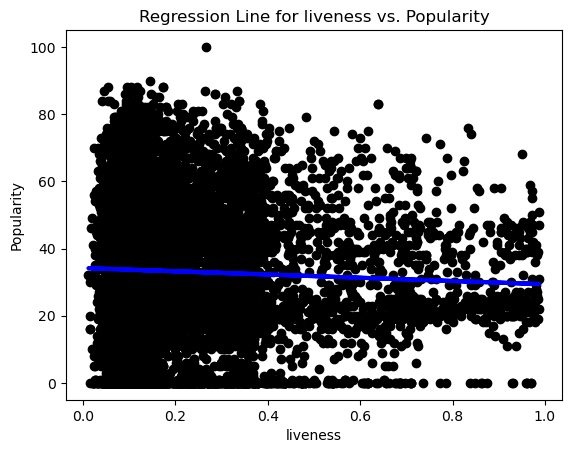

471.96170839801715
461.5604719910481


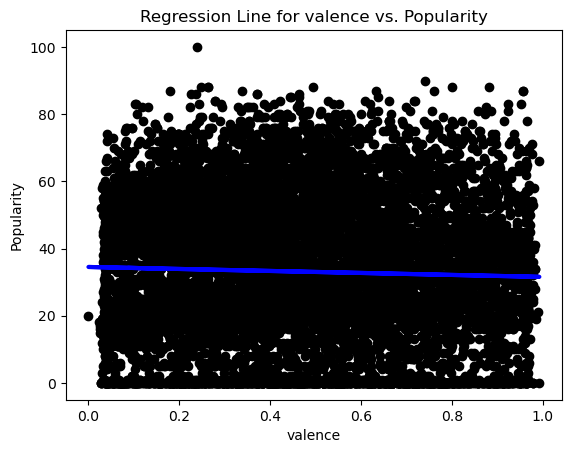

472.6935946092658
461.5604719910481


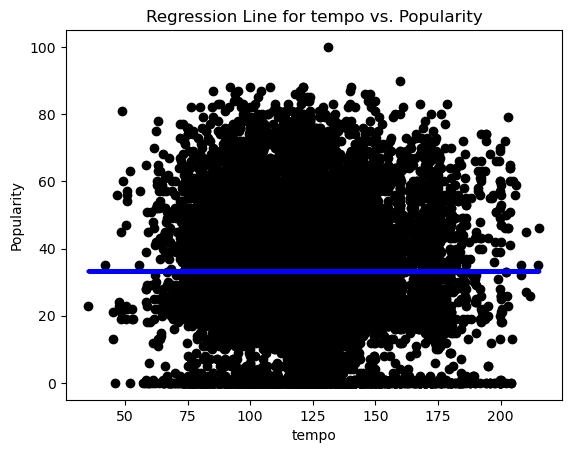

The best feature predicting popularity is: instrumentalness
The best RMSE: 21.483958480481387


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# List of features to test
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Initialize variables to store model performance
best_feature = None
best_mse = float('inf')  # Set initial best MSE to infinity

# Iterate through features and build models
for feature in features:
    # Extract feature and target
    X = df[[feature]]
    y = df['popularity']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19100731)

    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(mse)
    print(best_mse)
    # Update best feature if the current feature performs better
    if mse < best_mse:
        best_mse = mse
        best_feature = feature

    # Visualize the regression line
    plt.scatter(X_test, y_test, color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)
    plt.title(f'Regression Line for {feature} vs. Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')
    plt.show()

# Print the best feature
print(f"The best feature predicting popularity is: {best_feature}")
print(f"The best RMSE: {np.sqrt(best_mse)}")

We used simple linear regression models to evaluate every feature to predict song popularity. The feature 'instrumentalness' is the most significant predictor of song popularity.   The R square value given is 0.023 and the RMSE is 21.483, which means that the proportion of the variance that can be accounted for by the model is only 0.023 and this single predictor can not fit the data well.

### 5) Building a model that uses *all* of the song features mentioned in question 1, how well can you predict popularity? How much (if at all) is this model improved compared to the model in question 4). How do you account for this? What happens if you regularize your model?

In [177]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV


# Extract features and target
X = df[['duration', 'danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19100731)

# Build a multiple linear regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mlr = multiple_lr.predict(X_test)

# Calculate RMSE for the linear model
r2_mlr = mean_squared_error(y_test, y_pred_mlr)

print(f"R2 of the multiple linear regression model: {np.sqrt(r2_mlr)}")



R2 of the multiple linear regression model: 21.155204547964985


In [179]:
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

ridge_model = Ridge()

grid_search = GridSearchCV(ridge_model, {'alpha': alphas}, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_r2 = grid_search.best_score_

print(f"Best r2: {best_r2} in train set")

final_ridge_model = Ridge(alpha=best_alpha)
final_ridge_model.fit(X_train, y_train)

y_pred_ridge = final_ridge_model.predict(X_test)

r2_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Best alpha: {best_alpha}")
print(f"R2 of the Ridge regression model with best alpha: {np.sqrt(r2_ridge)}")

Best r2: 0.04564309057505287 in train set
Best alpha: 1.0
R2 of the Ridge regression model with best alpha: 21.155245013610042


After building a multiple linear regression model with all 10 given features, the resulting RMSE is 21.15, which is actually a downgrade from the best model from question 4. 
	After regularization with the Ridge regression model, we found that the best alpha value was 1, and the resulting RMSE was 21.15, virtually no improvement at all. This can be explained by the fact that the original model is not overfitting before regularization.


### 6) When considering the 10 song features in the previous question, how many meaningful principal components can you extract? What proportion of the variance do these principal components account for? 

### Using these principal components, how many clusters can you identify? Do these clusters reasonably correspond to the genre labels in column 20 of the data?

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Extract the 10 song features
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

X = df[features]

pca = PCA()

principal_components = pca.fit_transform(StandardScaler().fit_transform(X))



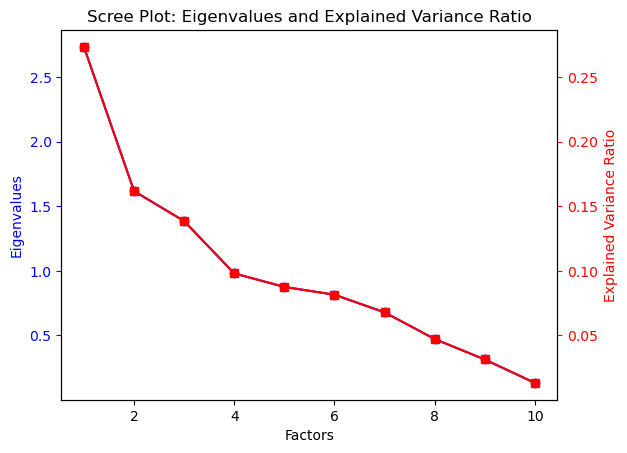

Loading Matrix:
                       PC1       PC2       PC3       PC4       PC5       PC6  \
duration         -0.028965  0.292382 -0.072764  0.825716  0.260080  0.382633   
danceability     -0.154893 -0.568718 -0.187694  0.316386  0.132779 -0.226342   
energy           -0.536818  0.191436  0.054129  0.026530 -0.090295 -0.225206   
loudness         -0.539108  0.039442 -0.028588 -0.054447 -0.190998  0.099687   
speechiness      -0.067178 -0.144096  0.651549  0.122227  0.173113 -0.236105   
acousticness      0.474215 -0.240438  0.179810 -0.083023  0.178322  0.216769   
instrumentalness  0.271022  0.328317 -0.141269  0.185669  0.139748 -0.788553   
liveness         -0.109100  0.070635  0.667588  0.056963  0.093122  0.002284   
valence          -0.209770 -0.548774 -0.132136  0.066427  0.299710 -0.099085   
tempo            -0.193923  0.245683 -0.125662 -0.387895  0.830843  0.085629   

                       PC7       PC8       PC9      PC10  
duration          0.020036  0.102726 -0.0385

In [15]:
# Scree plot
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

fig, ax1 = plt.subplots()

ax1.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', label='Eigenvalues', color='b')
ax1.set_xlabel('Factors')
ax1.set_ylabel('Eigenvalues', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 's-', label='Explained Variance Ratio', color='r')
ax2.set_ylabel('Explained Variance Ratio', color='r')
ax2.tick_params('y', colors='r')

plt.title('Scree Plot: Eigenvalues and Explained Variance Ratio')
plt.show()

# Explanation of the loading matrix：
# The values in the matrix indicate the contribution of each original feature to the corresponding principal 
# component.
loading_matrix = pca.components_.T

# Display the loading matrix
loading_matrix_df = pd.DataFrame(loading_matrix, columns=[f'PC{i+1}' for i in range(len(features))], index=features)
print("Loading Matrix:")
print(loading_matrix_df)

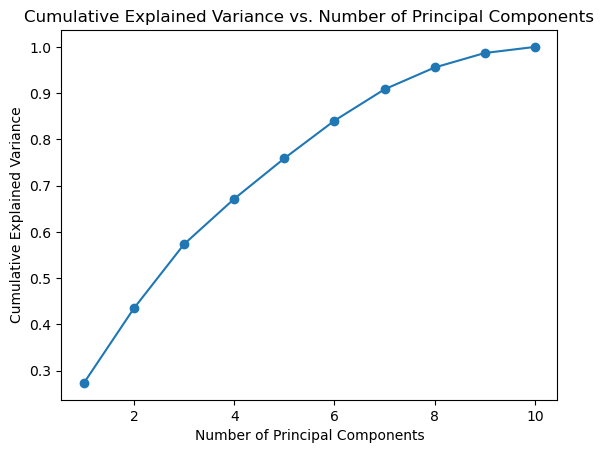

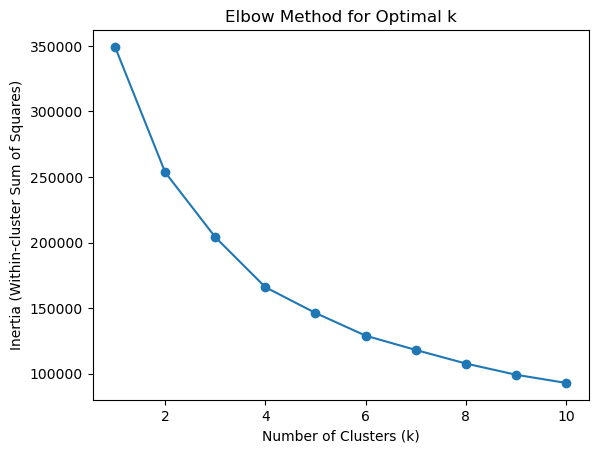

In [75]:
# Calculate the proportion of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

# Determine the number of principal components to retain based on the plot
num_components_to_retain = 4  # Adjust based on the plot and your desired threshold

# Retain the selected number of principal components
X_pca = principal_components[:, :num_components_to_retain]


k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=19100731)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()


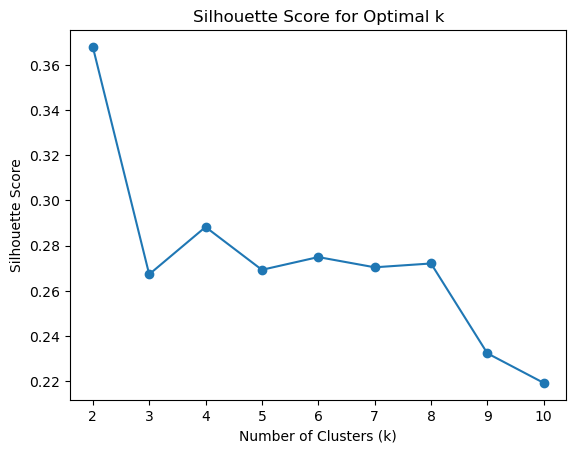

Optimal number of clusters (k): 2


In [77]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=19100731)
    labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Determine the optimal number of clusters based on the silhouette scores
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters (k): {optimal_k}')


Using the explained variance ratio, we decided to keep 4 principle components. Together, these 4 account for ~70% of the variance. Using these components, we used the silhouette method (find the maximum sum of silhouette score with different k) and finally settled on 2 clusters. As can be seen from the scatterplot, these clusters are not satisfactory and do not  reasonably correspond to the number of genre labels(52) in column 20 of the data, which may happen when different genres exhibit similar characteristics.

### 7) Can you predict whether a song is in major or minor key from valence using logistic regression or a support vector machine? If so, how good is this prediction? If not, is there a better one?

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# Extract features and target
X = df[['valence']]
y = df['mode']  # 'mode' is 1 for major and 0 for minor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19100731)

# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=19100731)

# Fit the model to the training data
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC: {auc}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.61625
AUC: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3991
           1       0.62      1.00      0.76      6409

    accuracy                           0.62     10400
   macro avg       0.31      0.50      0.38     10400
weighted avg       0.38      0.62      0.47     10400



In [44]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X = df[['valence']]
y = df['mode'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19100731)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(probability=True, random_state=19100731)  

svm_model.fit(X_train_scaled, y_train)

y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

# Convert probabilities to binary predictions and use classification report
y_pred = svm_model.predict(X_test_scaled)

auc = roc_auc_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)
print(f'AUC: {auc}')
print("Classification Report:\n", classification_rep)


AUC: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3991
           1       0.62      1.00      0.76      6409

    accuracy                           0.62     10400
   macro avg       0.31      0.50      0.38     10400
weighted avg       0.38      0.62      0.47     10400



### 8) Can you predict genre by using the 10 song features from question 4 directly or the principal components you extracted in question 6 with a neural network? How well does this work?

In [147]:
! pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 28.7 MB/s eta 0:00:0000:0100:01


In [187]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Features and target
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'track_genre'

# Extract features and target
X = df[features].values
y = df[target].values

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_encoded, test_size=0.2, random_state=random_state)

# Convert to PyTorch tensors
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.output_layer(x)
        return x

# Instantiate the model
input_size = len(features)
hidden_size1 = 64
hidden_size2 = 32
output_size = len(np.unique(y_encoded))
model = NeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test_tensor)
    _, y_pred = torch.max(y_pred_prob, 1)
    y_probability_for_each_class = torch.softmax(y_pred_prob, dim=1)


# Convert PyTorch tensor to NumPy array
y_pred_np = y_pred.numpy()

# Decode the labels
y_pred_decoded = label_encoder.inverse_transform(y_pred_np)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Accuracy of the neural network model: {accuracy}")
auc= roc_auc_score(y_test,y_probability_for_each_class, multi_class='ovr', average='macro')
print(f"AUC of the neural network model: {auc}")

Accuracy of the neural network model: 0.2789423076923077
AUC of the neural network model: 0.8869175106319028


### 9) In recommender systems, the popularity based model is an important baseline. We have a two part question in this regard: 
 
 
### a) Is there a relationship between popularity and average star rating for the 5k songs we have explicit feedback for? 

### b) Which 10 songs are in the “greatest hits” (out of the 5k songs), on the basis of the popularity based model?


In [204]:
import pandas as pd
ratings=pd.read_csv('starRatings.csv', header = None)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
avg_ratings = ratings.mean(axis = 0)
first_5k = df[:5000]
first_5k['avg_rating'] = avg_ratings
first_5k

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,avg_rating
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.6760,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.196939
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.4200,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1.361029
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.4380,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2.186377
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.2660,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1.576998
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.6180,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.038835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Ludovico Einaudi,Elements (Deluxe),Drop,49,300293,False,0.4650,0.0342,2,-28.257,0,0.0401,0.9920,0.939000,0.1030,0.0590,152.054,4,ambient,0.833843
4996,4996,Air,Moon Safari,Kelly Watch the Stars,55,226293,False,0.5160,0.7430,2,-8.470,1,0.0292,0.2820,0.637000,0.1110,0.2260,109.837,4,ambient,2.368473
4997,4997,Ludovico Einaudi,Islands - Essential Einaudi,Passagio,50,357773,False,0.2220,0.0200,9,-27.114,1,0.0464,0.9950,0.948000,0.0945,0.1190,85.860,4,ambient,0.914201
4998,4998,Liquid Mind,Liquid Mind II: Slow World,Blue Seven,24,760053,False,0.0576,0.1690,10,-20.216,1,0.0484,0.9030,0.966000,0.1170,0.0310,50.838,4,ambient,0.890088


In [206]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = first_5k[['popularity']]
y = first_5k['avg_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19100731)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.3482693683195061
R-squared: 0.3132944465094094


H0: There is no relationship between average star rating and popularity of a song.

H1: There is a relationship between average star rating and popularity of a song.

In [207]:
threshold_avg = first_5k.loc[:,'avg_rating'].median()

high_popularity = first_5k[first_5k['avg_rating'] > threshold_avg]['popularity']
low_popularity = first_5k[first_5k['avg_rating'] <= threshold_avg]['popularity']

t, p = stats.ttest_ind(high_popularity, low_popularity, alternative = 'two-sided') 



if p <= 0.05:
    s = ', we reject the null hypothesis.'
    if t < 0: 
        relationship = 'negative'
    if t > 0:
        relationship = 'positive'
        
else: 
    s = ', we fail to reject the null hypothesis.'
    
print('The t-statistics is ' + str(t) + '. The p value is: ' + str(p) + s)
if p <= 0.05:
    print(f' The relationship is {relationship} between average star ratings and popularity of a song.')

The t-statistics is 40.913994743539135. The p value is: 0.0, we reject the null hypothesis.
 The relationship is positive between average star ratings and popularity of a song.


In [208]:
first_5k_sorted = first_5k.sort_values(by='popularity',ascending = False)
first_5k_sorted[:10]

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,avg_rating
2003,2003,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,4,alt-rock,3.729651
3003,3003,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,4,alternative,3.748950
3300,3300,Oliver Tree;Robin Schulz,Miss You,Miss You,87,206000,True,0.587,0.742,6,-6.640,0,0.0529,0.01280,0.001070,0.1460,0.199,145.007,4,alternative,3.415400
2000,2000,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,4,alt-rock,3.148004
3000,3000,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,4,alternative,3.140594
2106,2106,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alt-rock,3.549039
3004,3004,GAYLE,abcdefu,abcdefu,86,168601,True,0.695,0.540,4,-5.692,1,0.0493,0.29900,0.000000,0.3670,0.415,121.932,4,alternative,3.563261
2002,2002,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,-5.509,0,0.0300,0.04840,0.000417,0.2860,0.370,93.986,4,alt-rock,3.509865
3257,3257,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.00121,0.000000,0.0995,0.236,148.033,4,alternative,3.587866
3002,3002,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,-5.509,0,0.0300,0.04840,0.000417,0.2860,0.370,93.986,4,alternative,3.511397


### Another Way using Spearman correlation coefficient:

In [180]:
! pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 17.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-macosx_11_0_arm64.whl size=1108718 sha256=b97a9fb6c7e9e8071bd12c31141733f555a42e9c3df0566f2a5692507e8c81aa
  Stored in directory: /Users/christinaxy/Library/Caches/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [258]:
first_5k

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,avg_rating
0,0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.6760,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.196939
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.4200,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1.361029
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.4380,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,2.186377
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.2660,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1.576998
4,4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.6180,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.038835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,Ludovico Einaudi,Elements (Deluxe),Drop,49,300293,False,0.4650,0.0342,2,-28.257,0,0.0401,0.9920,0.939000,0.1030,0.0590,152.054,4,ambient,0.833843
4996,4996,Air,Moon Safari,Kelly Watch the Stars,55,226293,False,0.5160,0.7430,2,-8.470,1,0.0292,0.2820,0.637000,0.1110,0.2260,109.837,4,ambient,2.368473
4997,4997,Ludovico Einaudi,Islands - Essential Einaudi,Passagio,50,357773,False,0.2220,0.0200,9,-27.114,1,0.0464,0.9950,0.948000,0.0945,0.1190,85.860,4,ambient,0.914201
4998,4998,Liquid Mind,Liquid Mind II: Slow World,Blue Seven,24,760053,False,0.0576,0.1690,10,-20.216,1,0.0484,0.9030,0.966000,0.1170,0.0310,50.838,4,ambient,0.890088


In [259]:
from scipy.stats import spearmanr

# Calculate Spearman correlation
spearman_corr, p_value = spearmanr(first_5k['popularity'], first_5k['avg_rating'])

# Print the Spearman correlation and p-value
print(f"Spearman Correlation: {spearman_corr}")
print(f"P-Value: {p_value}")

# Draw conclusions
if p_value < 0.05:
    conclusion = "There is a significant correlation between popularity and average star rating."
else:
    conclusion = "There is no significant correlation between popularity and average star rating."

print(conclusion)

Spearman Correlation: 0.543458638456252
P-Value: 0.0
There is a significant correlation between popularity and average star rating.


In [264]:
average_ratings = ratings_df.mean(axis=1).rename('average_rating')
# Sort the songs by popularity in descending order
top_songs = average_ratings.nlargest(10)

# Display the top 10 songs
print("Top 10 Songs (Greatest Hits) based on Popularity:")



# indices_to_extract = top_songs[top_songs.columns(0)].astype(int)

# Use loc to extract specific rows and columns from df
result_df = df.loc[top_songs.index, ['track_name', 'artists', 'popularity']]
print(result_df)

Top 10 Songs (Greatest Hits) based on Popularity:
                                         track_name  \
2562                       You're Gonna Go Far, Kid   
3877                       You're Gonna Go Far, Kid   
2260                                     Can't Stop   
3216                                Californication   
3253  New Gold (feat. Tame Impala and Bootie Brown)   
2105                                Californication   
3003                                Sweater Weather   
2003                                Sweater Weather   
3256                                     Chop Suey!   
3054                              Shut Up and Dance   

                                artists  popularity  
2562                      The Offspring          81  
3877                      The Offspring          81  
2260              Red Hot Chili Peppers          82  
3216              Red Hot Chili Peppers          82  
3253  Gorillaz;Tame Impala;Bootie Brown          82  
2105              Re

### 10) You want to create a “personal mixtape” for all 10k users we have explicit feedback for. This mixtape contains individualized recommendations as to which 10 songs (out of the 5k) a given user will enjoy most. How do these recommendations compare to the “greatest hits” from the previous question and how good is your recommender system in making recommendations?

In [189]:
import pandas as pd
import numpy as np

ratings = pd.read_csv('starRatings.csv', header = None)
pd.set_option('display.max_rows', 30) 
pd.set_option('display.max_columns', 60)
ratings[:30]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,NaN,NaN,NaN,4.0,NaN,0.0,NaN
8,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
user_id = []
new_user_id = []
item_id = []
values = []
for user in range(10000):
    not_empty_scores = ratings.iloc[user].dropna()
    user_id.append(user)
    item_id.append(not_empty_scores.index)
    values.append(not_empty_scores)
    #print(not_empty_scores)
for item in range(len(item_id)):
    #print(len(item_id[item]))
    new_user_id.append([user_id[item]]*(len(item_id[item])))


'\nprint(user_id)\nprint(new_user_id)\nprint(item_id)\nprint(values)   \n    \n'

In [190]:
# create a new dataframe that represents user item interaction
user_id = []
new_user_id = []
item_id = []
values = []

for user in range(10000):
    not_empty_scores = ratings.iloc[user].dropna()
    user_id.append(user)
    item_id.append(not_empty_scores.index)
    values.append(not_empty_scores)
    #print(not_empty_scores)
for item in range(len(item_id)):
    #print(len(item_id[item]))
    new_user_id.append([user_id[item]]*(len(item_id[item])))
    
user_ids = []
item_ids = []
all_ratings = []
for i in new_user_id:
    for j in i:
        user_ids.append(j)
for i in item_id:
    for j in i:
        item_ids.append(j)
for i in values:
    for j in i:
        all_ratings.append(j)
'''
print(user_ids[:10000])
print(item_ids[:10000])
print(all_ratings[:10000])

'''


In [191]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix,csr_matrix
from implicit.als import AlternatingLeastSquares

new_df = pd.DataFrame({
    'user_id': user_ids,
    'movie_id': item_ids,
    'rating': all_ratings
})
# Create a sparse user-item matrix with missing values
user_item_matrix = coo_matrix((new_df['rating'], (new_df['user_id'], new_df['movie_id'])))

# Initialize ALS model
model = AlternatingLeastSquares(factors=50, regularization=0.01, iterations=50)


In [192]:
new_df

,user_id,movie_id,rating
0,0,24,2.0
1,0,28,0.0
2,0,34,0.0
3,0,35,0.0
4,0,39,0.0
...,...,...,...
4996168,9999,4982,1.0
4996169,9999,4985,2.0
4996170,9999,4988,3.0
4996171,9999,4991,1.0


In [193]:
sparse_customer_item = csr_matrix((new_df['rating'].astype(float), (new_df['user_id'], new_df['movie_id'])))
model.fit(sparse_customer_item)
customer_vecs = model.user_factors 
item_vecs = model.item_factors 
print(customer_vecs.shape)
print(item_vecs.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

(10000, 50)
(5000, 50)


In [196]:
def precision_at_k(actual_items, recommended_items, k):
    actual_set = set(actual_items)
    recommended_set = set(recommended_items[:k])
    
    intersection = actual_set & recommended_set
    precision = len(intersection) / k if k > 0 else 0.0
    
    return precision



In [197]:
# build a recommendation list for each of the users
from sklearn.preprocessing import MinMaxScaler
recommendations = {}
num_items = 10
all_precision = []

for customer_id in range(10000):
    #print(sparse_customer_item.shape)
    #customer_interactions = sparse_customer_item[customer_id,:].toarray().reshape(-1)
    #print(customer_interactions)
    #customer_interactions[customer_interactions > 1] = 0
    #print(customer_interactions.shape)
    rec_vector = customer_vecs[customer_id, :].dot(item_vecs.T)
    #print(rec_vector.shape)
    min_max = MinMaxScaler()
    rec_vector_scaled = min_max.fit_transform(rec_vector.reshape(-1,1))[:,0] #Scale this recommendation vector between 0 and 1
    #print(rec_vector_scaled.shape)
    #recommend_vector = customer_interactions * rec_vector_scaled
    #print(recommend_vector.shape)
    item_idx = np.argsort(rec_vector)[::-1][:num_items]
    recommendations[customer_id] = item_idx
    #print(item_idx)
    precision = precision_at_k(new_df[new_df['user_id']==customer_id]['movie_id'].tolist(),item_idx,10)
    all_precision.append(precision)

all_precision

[0.4,
 0.3,
 0.4,
 0.6,
 0.2,
 0.2,
 0.3,
 0.5,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.3,
 0.1,
 0.4,
 0.4,
 0.3,
 0.3,
 0.4,
 0.3,
 0.3,
 0.3,
 0.4,
 0.4,
 0.3,
 0.6,
 0.6,
 0.3,
 0.5,
 0.5,
 0.3,
 0.2,
 0.3,
 0.4,
 0.3,
 0.3,
 0.3,
 0.5,
 0.4,
 0.2,
 0.3,
 0.1,
 0.1,
 0.3,
 0.5,
 0.3,
 0.1,
 0.3,
 0.3,
 0.1,
 0.4,
 0.2,
 0.2,
 0.4,
 0.4,
 0.3,
 0.3,
 0.6,
 0.5,
 0.5,
 0.3,
 0.2,
 0.3,
 0.2,
 0.4,
 0.6,
 0.4,
 0.4,
 0.2,
 0.5,
 0.3,
 0.2,
 0.7,
 0.7,
 0.4,
 0.2,
 0.3,
 0.6,
 0.2,
 0.0,
 0.1,
 0.4,
 0.3,
 0.2,
 0.3,
 0.4,
 0.2,
 0.2,
 0.4,
 0.0,
 0.3,
 0.6,
 0.3,
 0.3,
 0.1,
 0.2,
 0.3,
 0.7,
 0.5,
 0.2,
 0.4,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.5,
 0.4,
 0.2,
 0.3,
 0.5,
 0.3,
 0.4,
 0.4,
 0.2,
 0.2,
 0.2,
 0.2,
 0.4,
 0.2,
 0.1,
 0.4,
 0.6,
 0.3,
 0.4,
 0.4,
 0.5,
 0.3,
 0.3,
 0.1,
 0.3,
 0.4,
 0.4,
 0.5,
 0.2,
 0.3,
 0.4,
 0.4,
 0.4,
 0.3,
 0.3,
 0.3,
 0.2,
 0.4,
 0.2,
 0.4,
 0.3,
 0.1,
 0.2,
 0.2,
 0.7,
 0.5,
 0.2,
 0.4,
 0.0,
 0.3,
 0.4,
 0.3,
 0.5,
 0.5,
 0.7,
 0.5,
 0.4,
 0.7,
 0.1,
 0.3

In [198]:
recommendations

{0: array([3003,  371, 3050, 3702, 2363, 2057, 3610, 3221,  418, 1505]),
 1: array([3853, 2461, 2916,  903, 2893, 2470, 2457, 3263, 3705, 3667]),
 2: array([2106, 3359, 3662, 2955, 2852, 3617, 2254, 3605, 2860, 3852]),
 3: array([2918, 2370,    4, 2009,  128, 2620, 2107, 2461, 3773, 2859]),
 4: array([2862, 3363, 3752, 3009, 3158,  365, 2581, 3608, 3964, 2721]),
 5: array([2761, 2563, 3260, 2470, 4134, 3007, 2518, 3216, 2353, 2908]),
 6: array([2750, 3613, 3261, 2752, 1029, 3900, 2106,  609, 3860, 2618]),
 7: array([ 291, 3967, 3359, 1100, 2155, 2856, 2306, 2701, 2555, 2871]),
 8: array([3803, 3912, 3005, 3260, 2618, 4002, 2402, 2654, 2753, 3570]),
 9: array([2351, 2507, 3713, 3054, 3651, 3151, 3752,  119, 2504, 2945]),
 10: array([3967, 2461, 2956, 3665, 2604,  159, 3764, 2913,  498, 2750]),
 11: array([3957, 2611, 2766,  506, 3566, 3554, 3156, 2630, 4000, 3925]),
 12: array([2204, 1300, 3104, 2554,  169, 2712, 3608, 2005, 2368, 2945]),
 13: array([3059, 2106, 3359, 3102, 2750, 3958, 

In [200]:
mean_average_precision = sum(all_precision)/len(all_precision)
mean_average_precision

0.3445800000000092

In [215]:
from collections import Counter


all_numbers = [num for sublist in recommendations.values() for num in sublist]
number_counts = Counter(all_numbers)
sorted_counts = sorted(number_counts.items(), key=lambda x: x[1], reverse=True)


print(sorted_counts)

[(2003, 526), (3253, 515), (3054, 500), (2260, 487), (2700, 472), (2504, 471), (3007, 461), (2611, 448), (2105, 448), (2753, 423), (3464, 419), (2461, 407), (3453, 405), (3765, 403), (3216, 396), (3877, 395), (2954, 392), (3359, 384), (3256, 384), (2562, 380), (3407, 377), (2360, 375), (3059, 373), (3004, 371), (3752, 369), (2715, 368), (2615, 368), (3201, 367), (2770, 358), (3614, 356), (3511, 351), (3102, 347), (2203, 347), (2011, 345), (3651, 344), (2106, 343), (3221, 340), (3971, 336), (2650, 335), (3870, 335), (2009, 332), (3758, 332), (3158, 329), (3100, 329), (3003, 327), (2110, 317), (2618, 309), (3050, 308), (3354, 305), (2601, 303), (3654, 300), (76, 297), (3002, 296), (3720, 293), (3708, 292), (2452, 291), (2908, 289), (3454, 289), (3558, 288), (2815, 287), (3710, 284), (3213, 284), (169, 282), (2607, 282), (3507, 281), (3759, 281), (2653, 280), (2804, 279), (3924, 278), (3660, 277), (3613, 272), (2363, 271), (3952, 270), (2054, 270), (2750, 269), (3901, 269), (2873, 269), (

In [231]:
top50_hits = set(first_5k_sorted[:50].index.tolist())
most_frequently_recommended = set([tup[0] for tup in sorted_counts[:10]])
most_frequently_recommended.intersection(top50_hits)

{2003, 2105, 2260, 2611, 3007, 3054, 3253}

The ratings dataset was preprocessed with handling missing values element-wise. It was switched into a dataframe that contains user_ids, movie_ids and their mapping ratings as three different columns, from which we created a sparse user_item matrix. Then we trained an ALS model from the matrix and generated movie recommendations for a specific user using the implicit library. We set the factors size as 50, which determines the number of the latent factors in the matrix factorization. Besides, we use a regularization strength of 0.01, and undergo 50 iterations during the optimization process. 
To evaluate the performance of our model, we choose the mean average precision, calculating the mean value of average precision for all the 10000 users. Our MAP is 0.3445, which indicates that we create a good personal mixtape recommender system. From the intersection of the top 50 hits using the popularity rank and the most 10 frequently recommended movies for all the 10k user, we conclude that it is more likely for a popular movie to be recommended for a user, but our algorithm also includes some personal preferences based on the latent factors learned from the ratings data.


###  Extra Credit: Are songs with a higher tempo more likely than songs with a lower tempo to be in major key?

In [232]:
import pandas as pd
import statsmodels.api as sm

# Fit logistic regression model
X = sm.add_constant(df[['tempo']])
y = df['mode']

logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the logistic regression summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.662563
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   mode   No. Observations:                52000
Model:                          Logit   Df Residuals:                    51998
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Dec 2023   Pseudo R-squ.:               9.348e-05
Time:                        15:23:43   Log-Likelihood:                -34453.
converged:                       True   LL-Null:                       -34456.
Covariance Type:            nonrobust   LLR p-value:                   0.01115
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5990      0.039     15.233      0.000       0.522       0.676
tempo         -0.0008      0.

The rationale behind investigating this relationship lies in the potential connection between musical characteristics (specifically tempo) and the tonality of a song. Understanding this relationship can provide insights into the patterns of musical composition and contribute to our knowledge of how tempo might influence the emotional or aesthetic qualities of a piece.

The logistic regression model was built using a binary dependent variable (mode), where 1 represents a major key, and 0 represents a minor key. The independent variable was tempo, and the logistic regression results indicate that there is a statistically significant association between tempo and the likelihood of a song being in a major key. The coefficient for the tempo variable is -0.0008, with a p-value of 0.011. This suggests that, holding other factors constant, as the tempo increases, the odds of a song being in a major key decrease. The pseudo R-squared value is very small (9.348e-05), indicating that the model explains a minimal amount of variability in the mode variable. The Wald test for the tempo variable (LLR p-value: 0.01115) further supports the significance of the tempo in predicting the likelihood of a song being in a major key. Overall, the findings suggest a modest but statistically significant relationship between tempo and the tonality of a song.
